In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
ids = [
    '10870674',
    '10853712',
    '10870675',
    '10870676',
    '10912259'
]

map_id = {
    '10870674': 'p=0.1',
    '10853712': 'p=0',
    '10870675': 'p=0.5',
    '10870676': 'p=0.9',
    '10912259': 'p=1'
}
root = r"/Users/tchataing/Documents/humanlisbet/results/bet_fits"

In [83]:
df = pd.DataFrame()
for dir in os.listdir(root):
    if dir in ids:
        dr = pd.read_csv(os.path.join(root, dir, 'training_history.log'))
        dr['id'] = map_id[dir]
        df = pd.concat([df, dr], ignore_index=True)



In [84]:
dl = df[['epoch', 'id']].copy()
da = df[['epoch', 'id']].copy()

ll = df.columns
for l in ll:
    if 'loss' in l:
        dl[l] = df[l]
    elif 'acc' in l:
        da[l] = df[l]

In [85]:
dm = da.melt(id_vars=['epoch', 'id'], var_name='metric', value_name='value')

In [86]:
dcorr = dm.pivot(index='epoch', values='value', columns=['metric','id']).corr()


In [87]:
dcorr.style.background_gradient(cmap='coolwarm')

In [49]:
df[['val_loss', 'epoch', 'id']].pivot(columns='id', values='val_loss', index='epoch').corr()

id,10870674,10870675,10870676,10912259
id,,,,
10870674,1.000000,0.967097,0.982518,0.987778
10870675,0.967097,1.000000,0.971410,0.967681
10870676,0.982518,0.971410,1.000000,0.981992
10912259,0.987778,0.967681,0.981992,1.000000


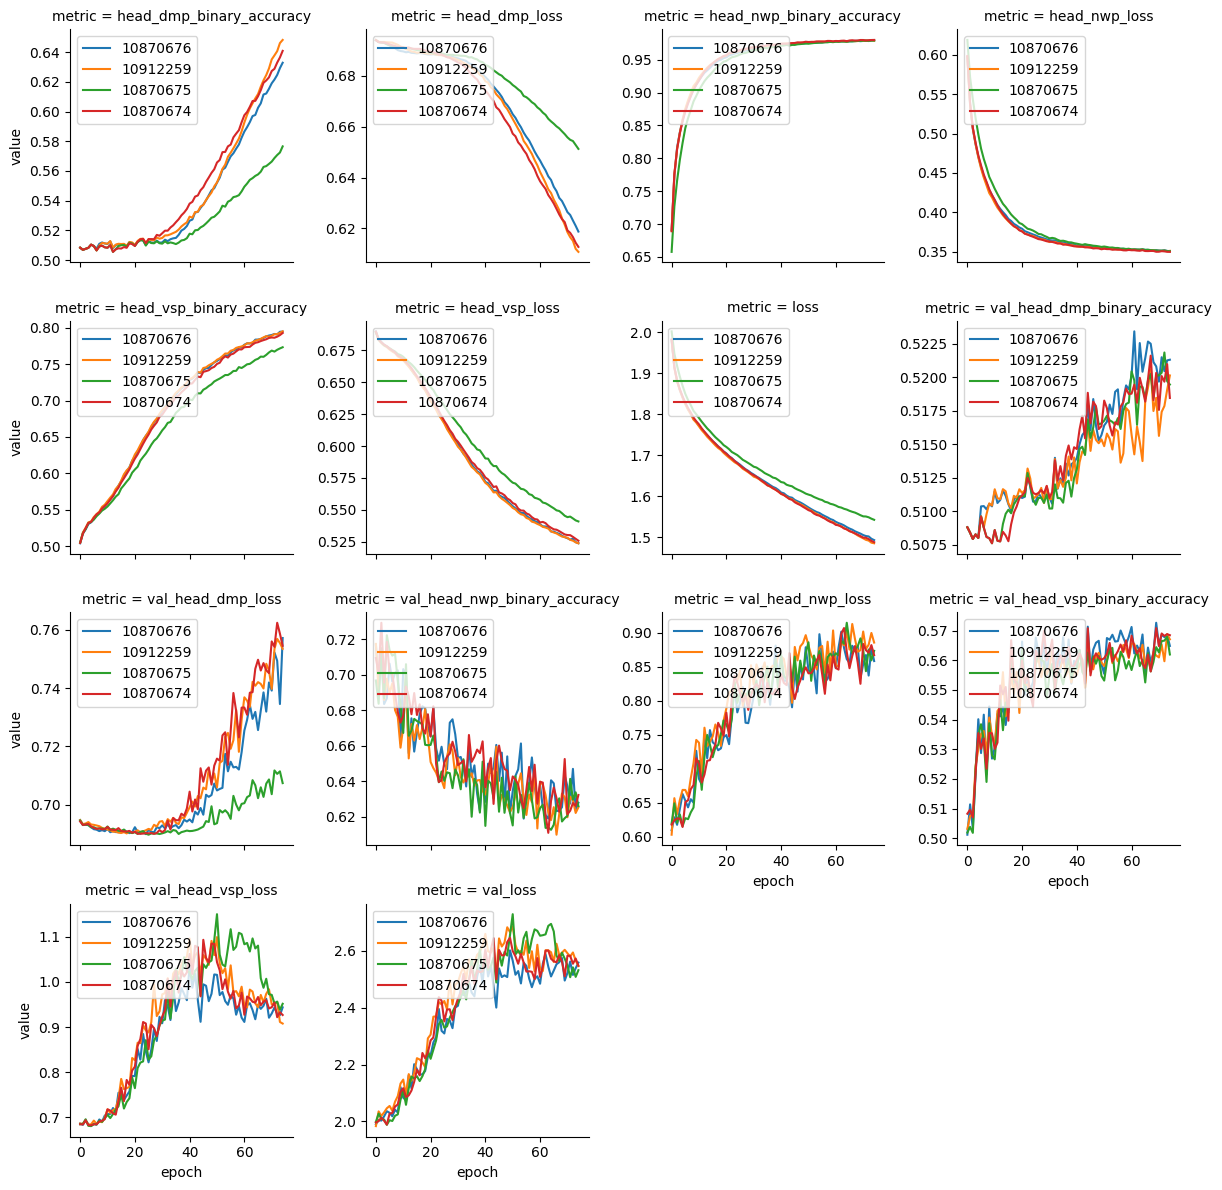

In [33]:
gr = sns.FacetGrid(data=dm, hue='id', col='metric', sharex=True, sharey=False, col_wrap=4)
gr.map(plt.plot, 'epoch', 'value')
# add legends
for ax in gr.axes.flat:
    ax.legend(*ax.get_legend_handles_labels(), loc='upper left')

plt.show()

KeyError: 'name'

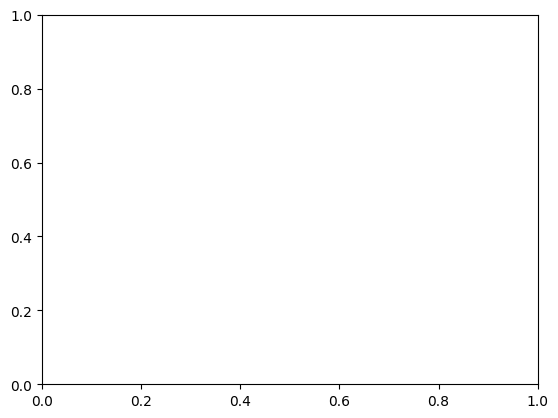

In [19]:
fig, ax = plt.subplots()  # create a figure and a set of subplots

for name, group in grouped_data:
    ax.plot(group['epoch'], group['name'], label=name)

ax.legend()  # add a legend
plt.show() 

In [20]:
name

'10870674'